# 4. Complex Oscillations

In physics and the other quantitative sciences, complex numbers are widely used for analyzing oscillations and waves. We begin our study of this topic with an elementary model called the **damped harmonic oscillator**.

## The damped harmonic oscillator

A particle of mass $m$ moves along one dimension, with $x(t)$ denoting its displacement at time $t$. It is subject to two forces: a spring force and a damping force. The spring constant is $k = m\omega_0^2$, and the damping coefficient is $2m \gamma$.  The parameters $m$, $\gamma$, and $\omega_0$ are all positive real numbers.

<img src="img/oscillator.png" alt="Mechanical model of a damped harmonic oscillator.">

According to Newton's second law,

$$m \frac{d^2 x}{dt^2} = F(x,t) = - 2m\gamma \frac{dx}{dt} - m\omega_0^2 x(t).$$

Dividing by the common factor of $m$, and bringing everything to one side, gives

$$\frac{d^2 x}{dt^2} + 2\gamma \frac{dx}{dt} + \omega_0^2 x(t) = 0.$$

This is called the **damped harmonic oscillator equation**. It is a second-order [ordinary differential equation](01_derivatives.ipynb#ODE) (ODE), so its general solution must contain two free parameters. These parameters are usually (but not necessarily) specified by the initial displacement $x(0)$ and initial velocity $\dot{x}(0)$.

<table width=75% style="font-size: 100%; border: 1px solid gray;">
    <tr><td style="text-align:left"><strong>Note</strong></td></tr>
<tr><td style="text-align:left">Sometimes, we write the damped harmonic oscillator equation as:$$\left[\frac{d^2}{dt^2} + 2\gamma \frac{d}{dt} + \omega_0^2 \right]\, x(t) = 0.$$ The quantity in square brackets is a linear differential operator acting on $x(t)$.  The three terms in the operator correspond to the three ingredients of the damped harmonic oscillator model: (i) a second derivative term stemming from Newton's second law, (ii) a first derivative term representing damping, and (iii) a constant term representing the spring force.<p>Writing the differential equation this way emphasizes its linearity, a property that is important for finding the solutions, <a href="#ansatz">as discussed below</a>.</p></td></tr></table>

### Simple harmonic oscillator limit

For $\gamma = 0$ (zero damping), the system reduces to the **simple harmonic oscillator**. From previous physics courses, we know the general solution for that is

$$x(t) = A \cos(\omega_0 t + \phi),$$

where $A$ and $\phi$ are free parameters. This is a sinusoidal oscillation with amplitude $A$, phase $\phi$, and frequency $\omega_0$.

The parameter $\omega_0$ comes from the spring constant $k = m\omega_0^2$. (In fact, the spring constant was parameterized this way so that the solution ends up with this nice form.) We therefore call $\omega_0$ the **natural frequency**, meaning the the frequency of the oscillator in the absence of damping or other disturbances.

<table width=75% style="font-size: 100%; border: 1px solid gray;">
    <tr><td style="text-align:left"><strong>Note</strong></td></tr>
<tr><td style="text-align:left">Some authors call $\omega_0$ the "angular frequency", reserving the term "frequency" for the quantity $f_0 = \omega_0/2\pi$.  But since we will always deal with $\omega_0$ rather than $f_0$, we will refer to $\omega_0$ as simply "frequency".</td></tr></table>

### Damped oscillations

For $\gamma > 0$, there is now a damping force opposing the motion of the oscillator. What form will the solutions take?

Before launching into the mathematics, let's use our physical intuition to make some guesses.

The damping force does work against the particle (since its sign is always opposite to the particle's velocity). If the damping force is very weak, the solution should not be too different from the simple harmonic oscillator solution &mdash; the particle should oscillate around the equilibrium point $x = 0$ with a frequency of around $\omega_0$. But the damping force will cause it to lose a bit of energy every oscillatory cycle, resulting in an oscillation whose amplitude diminishes slowly over time. In the $t \rightarrow \infty$ limit, all the energy is lost, and $x$ (as well as $\dot{x}$) should go asymptotically to zero.

The following code generates an animation demonstrating this behavior. (For now, don't worry about the formulas in it; we will get to them later.)

In [3]:
## Generate an animation of a damped harmonic oscillator.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

rc('animation', html='html5')

def oscillation_animation():
    x0, gamma, omega0 = 1.0, 0.1, 1.0
    tmin, tmax, nt = 0., 50., 200
    nframes, frame_dt = 75, 67
    tmin_plt, xlim, circ_pos = -5, 1.2, -2

    fig = plt.figure(figsize=(6,4))
    ax  = plt.subplot(1,1,1)
    ax.set_xlim(tmin_plt, tmax); ax.set_ylim(-xlim, xlim)

    t = np.linspace(tmin, tmax, nt)
    x = x0 * np.exp(-gamma*t) * np.cos(np.sqrt(omega0**2 - gamma**2)*t)
    plt.xlabel('t'); plt.ylabel('x')
    plt.title('Motion of a damped harmonic oscillator.')
    ax.plot(t, x, color='blue', linewidth=2)
    line, = ax.plot([], [], color='grey', linewidth=2)
    dash, = ax.plot([], [], '--', color='grey', markersize=12)
    circ, = ax.plot([], [], 'o', color='red', markersize=12)
    plt.close();

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], []); circ.set_data([], []); dash.set_data([], [])
        return line, circ, dash

    # animation function. This is called sequentially
    def animate(n):
        t = tmin + (tmax-tmin)*n/nframes
        line.set_data([t, t], [-xlim, xlim])        
        xc = x0 * np.exp(-gamma*t) * np.cos(np.sqrt(omega0**2 - gamma**2)*t)
        circ.set_data(circ_pos, xc); dash.set_data([circ_pos, t], [xc, xc])
        return line, circ, dash

    # call the animator. blit=True means only re-draw the parts that have changed.
    animator = animation.FuncAnimation(fig, animate, init_func=init,
                                       frames=nframes, interval=frame_dt, blit=True)
    return animator

oscillation_animation()

## The complex damped harmonic oscillator equation

The variable $x(t)$ is the displacement of the particle, so it ought to be real. However, a good way to solve the damped harmonic oscillator equation is to generalize $x(t)$ to *complex* values.  In other words, we convert the harmonic oscillator equation into a complex ODE:

$$\frac{d^2 z}{dt^2} + 2\gamma \frac{dz}{dt} + \omega_0^2 z(t) = 0, \quad z(t) \in \mathbb{C}.$$

The [parameter-counting rule for real ODEs](01_derivatives.ipynb#ODE) generalizes to complex ODEs, except that the free parameters should be complex numbers. In this case, the complex damped harmonic oscillator equation is a second-order ODE, so its general solution must have two complex free parameters.

If we can find a solution $z(t)$ for the complex damped harmonic oscillator equation, then its real part $x(t) = \mathrm{Re}[z(t)]$ solves the real damped harmonic oscillator equation, since

$$\begin{aligned}\frac{d^2 x}{dt^2} + 2\gamma \frac{dx}{dt} + \omega_0^2 x(t) &= \frac{d^2 \mathrm{Re}[z]}{dt^2} + 2\gamma \frac{d \mathrm{Re}[z]}{dt} + \omega_0^2 \, \mathrm{Re}[z(t)] \\ &= \mathrm{Re}\left[\frac{d^2 z}{dt^2} + 2\gamma \frac{dz}{dt} + \omega_0^2 z(t)\right] \\ &= 0.\end{aligned}$$

(Here, we have used the [previously-discussed fact](03_complex_numbers.ipynb#re_im_commuting) that the $\mathrm{Re}[\cdots]$ operation can be freely shuffled in or out of derivatives and sums with real coefficients.)

### Complex ansatz<a name="ansatz"></a>

We now aim to derive the general solution for the complex damped harmonic oscillator equation.

First, note that the equation is linear. This means that for any two solutions $z_1(t)$ and $z_2(t)$, a linear superposition

$$z(t) = a_1 \, z_1(t) \,+\, a_2 \,z_2(t),\quad \mathrm{where}\;\, a_1, a_2 \in \mathbb{C}$$

is also a solution. This can be verified by direct substitution into the ODE.

Due to linearity, a good strategy for finding the general solution is to identify two different *specific* solutions, $z_1(t)$ and $z_2(t)$. Then we can construct the above linear superposition, with the two complex coefficients $a_1$ and $a_2$ serving as free parameters. Any solution containing two free parameters is automatically the general solution.

So now we have to find some specific solutions. Let us make a guess (or **ansatz**):

$$z(t) = e^{-i\omega t}.$$

Here, $\omega$ is a (possibly complex) constant to be determined.  The first and second derivatives are:

$$\begin{align}\frac{dz}{dt} &= -i\omega\, e^{-i\omega t}, \\ \frac{d^2z}{dt^2} &= -\omega^2\, e^{-i\omega t}.\end{align}$$

Substituting these into the damped harmonic oscillator equation gives

$$\left(-\omega^2 - 2i\gamma \omega + \omega_0^2 \right) e^{-i\omega t} = 0.$$

This equation holds for all $t$ if and only if the complex second-order polynomial on the left-hand side is zero:

$$-\omega^2 - 2i\gamma \omega + \omega_0^2 = 0.$$

The solutions to the polynomial can be obtained from the quadratic formula:

$$\omega = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$

Hence, we have found the specific solutions

$$z_\pm(t) = \exp\left(-i\omega_\pm t\right), \;\;\mathrm{where}\;\; \omega_\pm = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$

Either $\omega_+$ or $\omega_-$ gives a valid specific solution to the damped harmonic oscillator equation. Note that the solution is *specific* and contains no free parameters, since $\omega_\pm$ is entirely determined by $\gamma$ and $\omega_0$ (which are fixed parameters appearing in the ODE, not free parameters).

### Complex frequencies

Before proceeding to the general solution, let us pause to interpret the specific solutions we have found.

These solutions have the form $e^{-i\omega t}$, where $\omega = \omega_\pm$ is a **complex frequency**. If we write the real and imaginary parts of $\omega$ as $\omega_R + i \omega_I$, then

$$z(t) = e^{-i\omega t} = e^{\omega_I t} \; e^{-i\omega_R t}.$$

If both $\omega_R$ and $\omega_I$ are non-zero, this describes [a spiral trajectory in the complex plane](03_complex_numbers.ipynb#complex_spiral) whose magnitude either increases or decreases with time, depending on the sign of $\omega_I$.  To see this explicitly, we can write

$$z(t) = e^{\omega_I t} \, e^{-i\omega_R t}.$$

Taking the real part,

$$\mathrm{Re}\left[z(t)\right] = e^{\omega_I t} \, \cos\left[\omega_R t\right].$$

The real part of $\omega$ determines the oscillation frequency. The imaginary part determines whether the amplitude grows with time ($\omega_I > 0$), decreases with time ($\omega_I < 0$), or remains constant ($\omega_I = 0$).

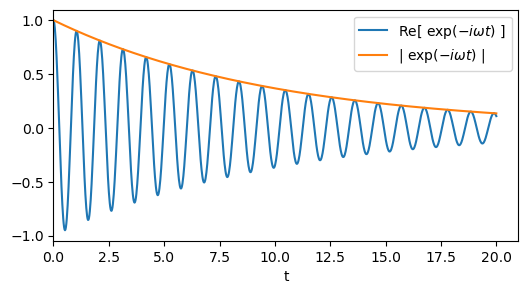

In [10]:
## In this example, we plot |z| and Re(z) for z = exp(-i omega t), with complex omega.
%matplotlib inline
import numpy as np

omega = 6.0-0.1j
t = np.linspace(0, 20, 1000)
z = np.exp(-1j*omega*t)

plt.figure(figsize=(6,3))
plt.plot(t, z.real, label='Re[ $\exp(-i \omega t)$ ]')
plt.plot(t, abs(z), label='| $\exp(-i \omega t)$ |')
plt.xlabel('t'); plt.xlim(0)
plt.legend()
plt.show()

The complex frequencies that we found are given by

$$\omega_\pm = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$

In the interactive plot below, we can see the positions of $\omega_+$ and $\omega_-$ in the complex plane, for different values of $\gamma$ and $\omega_0$:

In [15]:
## Plot the positions of omega_+ and omega_- in the complex plane
%matplotlib inline
from ipywidgets import interact, FloatSlider
import numpy as np
import matplotlib.pyplot as plt

def plot_frequencies(omega0, gamma):
    ## (Plot the circular arc that the points lie on.)
    phi = np.linspace(-np.pi, 0, 50)

    plt.figure(figsize=(6,3))
    ax = plt.subplot(1,1,1)
    ax.set_aspect('equal')
    plt.plot(omega0*np.cos(phi), omega0*np.sin(phi), linestyle="dashed", color="grey")
    plt.plot([0,0], [-2,0], linestyle="dashed", color="grey")

    ## Compute omega_+ and omega_- and plot in the complex plane.
    u = np.sqrt(np.abs(omega0**2 - gamma**2))
    if omega0 >= gamma:
        w1, w2 = -1j * gamma + u, -1j * gamma - u
    else:
        w1, w2 = -1j * (gamma - u), -1j * (gamma + u)
    
    plt.plot(w1.real, w1.imag, 'o', color="red", linewidth=4, label="$\omega_+$")
    plt.plot(w2.real, w2.imag, 'o', color="blue", linewidth=4, label="$\omega_-$")
    plt.title('Positions of $\omega_+$ and $\omega_-$ in the complex plane')
    plt.axis([-2, 2, -2, 0])
    plt.xlabel('Re[$\omega$]'); plt.ylabel('Im[$\omega$]')
    ax.legend(numpoints=1, loc='lower right')
    plt.show()

interact(plot_frequencies,
         omega0 = FloatSlider(min=0.5, max=1.5, step=0.1, value=1.0),
         gamma  = FloatSlider(min=0.0, max=1.25, step=0.05, value=0.1));

interactive(children=(FloatSlider(value=1.0, description='omega0', max=1.5, min=0.5), FloatSlider(value=0.1, d…

Note the following features:

* For $\gamma = 0$, the frequencies are both real, with values $\pm \omega_0$. This corresponds to simple harmonic oscillation at the natural frequency.
* If we increase $\gamma$ from zero with $\omega_0$ fixed, both $\omega_+$ and $\omega_-$ move downwards in the complex plane, along a circular arc.  Since the imaginary part is negative, both solutions describe damped oscillation. This is called **under-damped motion**.
* At $\gamma = \omega_0$, the frequencies meet along the imaginary axis. This is the case of **critical damping**, which we will discuss [later](#critical_damping).
* For $\gamma > \omega_0$, the two frequencies move apart along the imaginary axis. Purely imaginary frequencies correspond to decay without oscillating.  This is called **over-damped motion**, which we will also discuss [later](#overdamped).

## General solution for the damped harmonic oscillator

For now, let us suppose that $\omega_0 \ne \gamma$. Then we have two distinct specific solutions,

$$z_\pm(t) = e^{-i\omega_\pm t}, \;\;\mathrm{where}\;\;\; \omega_\pm = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$

By taking a linear superposition of these specific solutions, we obtain the general solution for the complex damped harmonic oscillator equation:

$$z(t) = a_+ e^{-i\omega_+ t} + a_- e^{-i\omega_- t},$$

where $a_+$ and $a_-$ are independent complex free parameters.

(Note that if $\omega_0 = \gamma$, then $z_+(t) = z_-(t)$, so $a_+$ and $a_-$ would be coefficients multiplying the same function, and we would not be allowed to treat them as two independent free parameters. We will discuss how to handle this case [later](#critical_damping).)

To find solutions to the real damped harmonic oscillator equation, we can now take $x(t) = \mathrm{Re}[z(t)]$. The resulting expression for $x(t)$ will depend on whether $\omega_0^2 - \gamma^2$ is positive or negative. These two cases lead to **under-damped solutions** and **over-damped solutions**, respectively, which will be discussed in the next two sections.

### Under-damped motion<a name="underdamped"></a>

First, consider $\omega_0 > \gamma$.  Let us define

$$\Omega = \sqrt{\omega_0^2 - \gamma^2} \in \mathbb{R},$$

so that $\omega_\pm = -i\gamma \pm \Omega$. Plugging this into the complex general solution gives

$$\begin{aligned}z(t) &= a_+ e^{-\gamma t} e^{-i\Omega t} + a_- e^{-\gamma t} e^{i\Omega t} \\ &= e^{-\gamma t} \left[a_+ e^{-i\Omega t} + a_- e^{i\Omega t} \right].\end{aligned}$$

We can use [Euler's formula](03_complex_numbers.ipynb#euler_formula) to simplify the terms in the brackets:

$$\begin{aligned}a_+ e^{-i\Omega t} + a_- e^{i\Omega t} &= a_+ \big[\cos(\Omega t)-i\sin(\Omega t)\big] + a_- \big[\cos(\Omega t)+i\sin(\Omega t)\big] \\ &= \big(a_+ + a_-\big) \cos(\Omega t) \;-\; i \big(a_+ - a_-\big) \sin(\Omega t)\end{aligned}$$

Hence,

$$\begin{aligned}x(t) &= \mathrm{Re}\left[z(t)\right] \\ &= e^{-\gamma t} \big[ A\cos\left(\Omega t\right) + B \sin\left(\Omega t\right) \big], \;\;\; \mathrm{where}\;\; \left\{\begin{aligned} A &= \mathrm{Re}\left[a_+ + a_-\right] \\ B &= \mathrm{Im}\left[a_+ - a_-\right].\end{aligned}\right.\end{aligned}$$

This is called an **under-damped solution**.  The coefficients $A$ and $B$ are two independent *real* parameters, so this serves as a general solution for the real damped harmonic oscillator equation. Using the trigonometric formulas, the solution can be equivalently written as

$$x(t) = C \,e^{-\gamma t} \, \cos\!\big(\Omega t + \Phi\big), \;\;\;\mathrm{where}\;\;\left\{\begin{aligned}C &= \sqrt{A^2 + B^2}, \\ \Phi &= - \tan^{-1}\left[B/A\right].\end{aligned}\right.$$

This shows explicitly that it consists of a sinusoidal oscillation (with frequency $\Omega$) overlaid on an "envelope" given by the exponentially decreasing function $\exp(-\gamma t)$.

The interactive plot below shows the graph of $x(t)$ versus $t$. The exponential envelope is also plotted as dashes. You should familiarize yourself with how different choices of fixed parameters ($\omega_0$ and $\gamma$) and free parameters ($C$ and $\Phi$) affect the shape of $x(t)$.

In [17]:
## Plot the trajectory of an under-damped oscillator
%matplotlib inline
from ipywidgets import interact, FloatSlider
import numpy as np
import matplotlib.pyplot as plt

def plot_underdamped(omega0, gamma, C, phi):
    x0, t = 1.0, np.linspace(0, 20, 120)
    xe = C * np.exp(-gamma*t)                             # The envelope
    x  = xe * np.cos(np.sqrt(omega0**2 - gamma**2)*t+phi) # The solution
    
    plt.figure(figsize=(6,4))
    ## Plot envelope
    ax = plt.subplot(1,1,1)
    plt.title('Motion of underdamped oscillator')
    plt.plot(t, x, 'b', label='x(t)')
    plt.plot(t, xe, 'r--', label='Envelope')
    plt.plot(t, -xe, 'r--')
    ## Axes, etc.
    plt.xlabel('t'); plt.xlim(t[0], t[-1])
    plt.ylabel('x'); plt.ylim(-x0, x0)
    ax.legend(numpoints=1, loc='upper right')
    plt.show()

interact(plot_underdamped,
         omega0 = FloatSlider(min=0.4, max=2.0, step=0.1, value=1.0),
         gamma  = FloatSlider(min=0.0, max=0.5, step=0.05, value=0.1),
         C      = FloatSlider(min=0.0, max=1.0, step=0.05, value=1.0),
         phi    = FloatSlider(min=-3.14, max=3.14, step=0.02, value=0.0));

interactive(children=(FloatSlider(value=1.0, description='omega0', max=2.0, min=0.4), FloatSlider(value=0.1, d…

### Over-damped motion<a name="overdamped"></a>

For $\omega_0 < \gamma$, the square root term in $\omega_\pm = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}$ is imaginary.  Let us define

$$\Gamma = \sqrt{\gamma^2 - \omega_0^2} \quad \Rightarrow \quad \omega_\pm = i \left(-\gamma \pm \Gamma\right).$$

Then the complex general solution can be simplified to

$$z(t) = a_+ e^{-\left(\gamma - \Gamma\right)\, t} + a_- e^{-\left(\gamma + \Gamma\right)\, t},$$

and the real solution is

$$\begin{aligned} x(t) &= \mathrm{Re}\left[z(t)\right] \\&= C_+ e^{-(\gamma - \Gamma) \,t} + C_- e^{-(\gamma + \Gamma) \, t},\;\;\;\mathrm{where}\;\; C_\pm = \mathrm{Re}[a_\pm].\end{aligned}$$

This is called an **over-damped solution**.  It consists of two exponentially decaying terms, with decay rates $(\gamma-\Gamma)$ and $(\gamma + \Gamma)$ respectively. Since $\Gamma < \gamma$, both decay rates are positive real numbers, but note that $(\gamma - \Gamma)$ *decreases* with $\gamma$, whereas $(\gamma + \Gamma)$ *increases* with $\gamma$, as shown below:

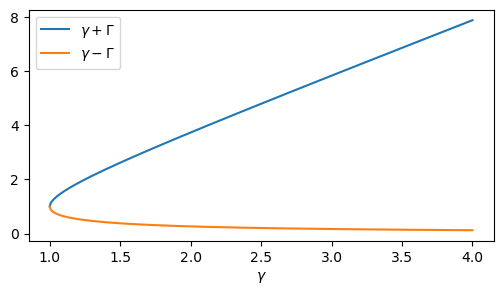

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

omega0 = 1.0
gamma  = np.linspace(1, 4, 500)
Gamma  = np.sqrt(gamma**2 - omega0**2)
plt.figure(figsize=(6,3))
plt.plot(gamma, gamma + Gamma, label=r'$\gamma + \Gamma$')
plt.plot(gamma, gamma - Gamma, label=r'$\gamma - \Gamma$')
plt.xlabel(r'$\gamma$')
plt.legend()
plt.show()

Since the larger decay rate, $(\gamma + \Gamma)$, is associated with a faster-decaying exponential, for large $t$ the second term should become negligible compared to the first term. Then the solution should approach the limiting form

$$x(t) \approx C_+ e^{-(\gamma - \Gamma) t} \qquad (\mathrm{for}~\mathrm{large}~t).$$

The following interactive plot shows how $x(t)$ depends on different choices of $\omega_0$, $\gamma$, $C_+$, and $C_-$. The limiting form of $x(t)$ for large $t$ is plotted as dashes.

In [21]:
## Plot the trajectory of an over-damped oscillator
%matplotlib inline
from ipywidgets import interact, FloatSlider
import numpy as np
import matplotlib.pyplot as plt

def plot_overdamped(omega0, gamma, C_minus, C_plus):
    x0, t = 2.0, np.linspace(0, 10, 150)

    ## Trajectory formulas
    G = np.sqrt(gamma**2 - omega0**2)
    xe = C_minus * np.exp(-(gamma-G)*t)
    x  = xe + C_plus * np.exp(-(gamma+G)*t)
    
    plt.figure(figsize=(6,4))
    ax = plt.subplot(1,1,1)
    plt.title('Motion of an overdamped oscillator')
    plt.plot(t, x, 'b', label='x(t)')
    plt.plot(t, xe, 'r--', label='Limit')
    plt.axis([t[0], t[-1], -0.1*x0, x0])
    plt.xlabel('t'); plt.ylabel('x')
    ax.legend(numpoints=1, loc='upper right')
    plt.show()

interact(plot_overdamped,
         omega0  = FloatSlider(min=0.1, max=1.0, step=0.1, value=1.0),
         gamma   = FloatSlider(min=1.0, max=5.0, step=0.1, value=0.1),
         C_minus = FloatSlider(min=0.0, max=1.0, step=0.1, value=1.0),
         C_plus  = FloatSlider(min=0.0, max=1.0, step=0.1, value=1.0));

interactive(children=(FloatSlider(value=1.0, description='omega0', max=1.0, min=0.1), FloatSlider(value=1.0, d…

If we carefully study how the graph changes with $\gamma$, we observe something interesting: *for stronger damping, the decay rate at long times is slower*. This is the opposite of the under-damped oscillator's behavior! Mathematically, it happens because the decay rate $(\gamma-\Gamma)$, appearing in the limiting form of $x(t)$ for large $t$, is a decreasing function of $\gamma$.

In the over-damped regime, the motion of the oscillator is dominated by the damping force rather than the spring force. Therefore, as the oscillator tries to return to its equilibrium position $x = 0$, the damping acts against this motion, and the stronger the damping, the slower the decay to equilibrium. By contrast, in the [under-damped regime](#underdamped), the spring force is dominant, so stronger damping leads to faster decay via faster dissipation of the oscillator's kinetic energy.

### Critical damping<a name="critical_damping"></a>

**Critical damping** occurs when $\omega_0 = \gamma$.  Under this special condition, [the solution we previously derived](#ansatz) reduces to

$$z(t) = \left(a_+ + a_-\right) e^{-\gamma t}.$$

This has only *one* independent complex parameter, i.e. the parameter $(a_+ + a_-)$.  Therefore, it cannot be a general solution for the complex damped harmonic oscillator equation.

We will not go into detail here regarding the procedure for finding the general solution for the critically-damped oscillator, leaving it as an [exercise](#exercises) for the interested reader. Basically, it involves Taylor expanding the solution near the critical point, and then showing that there is a solution of the form

$$z(t) = \left(A + B t\right)\, e^{-\gamma t},$$

which contains the desired two independent parameters.

The critically-damped solution contains an exponential decay constant of $\gamma$, which is the same as the decay constant for the [envelope function in the under-damped regime](#underdamped), and *smaller* than the (long-time) decay constants in the [over-damped regime](#overdamped).  Hence, we can regard the critically-damped solution as the *fastest-decaying non-oscillatory solution*.

This feature of critical damping is employed in many engineering contexts, the most familiar being automatic door closers. If the damping is too weak or the spring force is too strong (under-damped), the door slams shut, whereas if the damping is too strong or the spring force is too weak (under-damping), the door takes unnecessarily long to swing shut. For best performance, an automatic door closer should be tuned to a "sweet spot" that corresponds to the critical point of a damped harmonic oscillator.

## Stating the solution in terms of initial conditions

The general solution for the complex damped harmonic oscillator equation contains two undetermined parameters which are the complex amplitudes of the "clockwise" and "counterclockwise" complex oscillations:

$$z(t) = a_+ e^{-i\omega_+ t} + a_- e^{-i\omega_- t}, \quad\mathrm{where} \;\; \omega_\pm =  -i\gamma  \pm \sqrt{\omega_0^2 - \gamma^2}.$$

However, mechanics problems are often expressed in terms of an **initial value problem**, specifying the state of the system at some initial time $t = 0$. In other words, given $z(0) \equiv x_0$ and $\dot{z}(0) \equiv v_0$, what is $z(t)$ in terms of $x_0$ and $v_0$?

We can solve the initial-value problem by finding $z(0)$ and $\dot{z}(0)$ in terms of the above general solution for $z(t)$:

$$\begin{aligned} z(0) &= \quad a_+ + a_- &&= x_0 \\ \dot{z}(0) &= -i\omega_+ a_+ - i \omega_- a_- &&= v_0.\end{aligned}$$

These two equations can be combined into a 2x2 matrix equation:

$$\begin{bmatrix}1 & 1 \\ -i\omega_+ & -i\omega_-\end{bmatrix} \begin{bmatrix}a_+ \\ a_-\end{bmatrix} = \begin{bmatrix}x_0 \\ v_0\end{bmatrix}.$$

So long as $\omega_+ \ne \omega_-$, the matrix is non-singular, and we can invert it to obtain $a_\pm$:

$$\begin{bmatrix}a_+ \\ a_-\end{bmatrix} = \frac{1}{i(\omega_+-\omega_-)}\begin{bmatrix}-i\omega_-x_0 - v_0 \\ i\omega_+x_0 + v_0 \end{bmatrix}.$$

We can plug these coefficients back into the general solution. After some algebra, the result simplifies to

$$z(t) = e^{-\gamma t} \left[x_0 \cos(\Omega t) + \frac{\gamma x_0 + v_0}{\Omega} \, \sin(\Omega t)\right], \;\; \mathrm{where}\;\; \Omega \equiv \sqrt{\omega_0^2 - \gamma^2}.$$

For the under-damped case, $\Omega$ is real, and this solution is consistent with the one [we previously derived](#underdamped), except that it is now explicitly expressed in terms our initial conditions $x_0$ and $v_0$. As for the [over-damped case](#overdamped), we can perform the replacement

$$\Omega \rightarrow i \Gamma = i \sqrt{\gamma^2 - \omega_0^2}.$$

Then, using the [relationships between trigonometric and hyperbolic functions](00_mathfunctions.ipynb#hyperbolic), the solution can be re-written as

$$\begin{aligned}z(t) &= e^{-\gamma t} \left[x_0 \cosh(\Gamma t) + \frac{\gamma x_0 + v_0}{i\Gamma} \, i \sinh(\Gamma t)\right] \\ &= \left(\frac{x_0}{2} + \frac{\gamma x_0 + v_0}{2\Gamma}\right) e^{-(\gamma - \Gamma) t} + \left(\frac{x_0}{2} - \frac{\gamma x_0 + v_0}{2\Gamma}\right) e^{-(\gamma+\Gamma)t},\end{aligned}$$

which is consistent with our [previous result](#overdamped).

In either case, so long as we plug in real values for $x_0$ and $v_0$, the solution is guaranteed to be real for all $t$.  That's to be expected, since the real solution is also one of the specific solutions for the complex harmonic oscillator equation. The resulting solution is plotted below.

In [24]:
## Plot the general trajectory of an oscillator.
%matplotlib inline
from ipywidgets import interact, FloatSlider
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

def plot_oscillator(omega0, gamma, x0, v0):
    t = np.linspace(0, 20, 100)

    if omega0 > gamma:
        W = np.sqrt(omega0**2 - gamma**2)
        A, B = x0, (gamma*x0+v0)/W
        x = np.exp(-gamma*t) * (A * np.cos(W*t) + B * np.sin(W*t))
    elif omega0 < gamma:
        G = np.sqrt(gamma**2 - omega0**2)
        A = 0.5*(x0 + (gamma*x0 + v0)/G)
        B = 0.5*(x0 - (gamma*x0 + v0)/G)
        x = A*np.exp(-(gamma-G)*t) + B * np.exp(-(gamma+G)*t)
    else:
        x = (x0 + (v0+gamma*x0)*t) * np.exp(-gamma*t)

    plt.figure(figsize=(6,4))
    ax = plt.subplot(1,1,1)
    plt.plot(t, x, 'b', label='x(t)')
    lim = max(ceil(1.1*max(abs(x))), 6.0)
    plt.xlabel('t'); plt.xlim(t[0], t[-1])
    plt.ylabel('x'); plt.ylim(-lim, lim)
    ax.legend(numpoints=1, loc='upper right')
    plt.show()

interact(plot_oscillator,
         omega0 = FloatSlider(min=0.1, max=1.9, step=0.1, value=0.5),
         gamma  = FloatSlider(min=0.0, max=2.0, step=0.05, value=0.5),
         x0     = FloatSlider(min=-2., max=2.0, step=0.1, value=1.0),
         v0     = FloatSlider(min=-5., max=5.0, step=0.1, value=5.0));

interactive(children=(FloatSlider(value=0.5, description='omega0', max=1.9, min=0.1), FloatSlider(value=0.5, d…

## Exercises

1. In the [general solution for the complex damped harmonic oscillator equation](#ansatz), we encountered the complex frequencies $$\omega_\pm = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$ For fixed $\omega_0$ and $\omega_0 > \gamma$ (under-damping), prove that $\omega_\pm$ lie along a circular arc in the complex plane.
2. Derive the [general solution for the critically-damped oscillator](#critical_damping), by following these steps:
    1. Consider the complex ODE, in the under-damped regime $\omega_0 > \gamma$.  We [have shown](#ansatz) that the general solution has the form $$z(t) = \psi_+ \, \exp\left[\left(-\gamma  - i \sqrt{\omega_0^2 - \gamma^2}\right)t\right] \; +\; \psi_- \, \exp\left[\left(-\gamma +i\sqrt{\omega_0^2 - \gamma^2}\right)t\right]$$ for some complex parameters $\psi_+$ and $\psi_-$.  Define the positive parameter $\varepsilon = \sqrt{\omega_0^2 - \gamma^2}$.  Re-write $z(t)$ in terms of $\gamma$ and $\varepsilon$ (i.e., eliminating $\omega_0$).
    2. The expression for $z(t)$ is presently parameterized by the independent parameters $\psi_+$, $\psi_-$, $\varepsilon$, and $\gamma$.  We are free to re-define the parameters, by taking $$\begin{aligned}\alpha &= \psi_+ + \psi_- \\ \beta &= -i\varepsilon(\psi_+ - \psi_-).\end{aligned}$$ Using these equations, express $z(t)$ using a new set of independent complex parameters, one of which is $\varepsilon$. Explicitly identify the other independent parameters, and state whether they are real or complex.
    3. Expand the exponentials in $z(t)$ in terms of the parameter $\varepsilon$.  Then show that in the limit $\varepsilon \rightarrow 0$, $z(t)$ reduces to the [critically-damped general solution](#critical_damping).
3. Repeat the above derivation for the critically-damped solution, but starting from the over-damped regime $\gamma > \omega_0$.
3. Let $z(t)$ be a complex function of a real input $t$, which obeys the differential equation $$\frac{dz}{dt} = -i\,(\omega_1 - i \gamma)\; z(t),$$ where $\omega_1$ and $\gamma$ are real. Find the general solution for $z(t)$, and hence show that $z(t)$ satisfies the damped oscillator equation $$\left[\frac{d^2}{dt^2} + 2\gamma \frac{d}{dt} + \omega_0^2 \right] z(t) = 0$$ for some $\omega_0^2$. Finally, show that this harmonic oscillator is always under-damped. [(Solution)](11_solutions.ipynb#04_04)